<a href="https://colab.research.google.com/github/Mounikabethi12/GenerativeAI-2303A52196/blob/main/2303A52196_LAB_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/diabetes.csv')


print(data.head())


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden Layer 1
    Dense(16, activation='relu'),                                    # Hidden Layer 2
    Dense(20, activation='relu'),                                    # Hidden Layer 3
    Dense(10, activation='relu'),                                    # Hidden Layer 4
    Dense(1, activation='sigmoid')                                   # Output Layer (binary classification)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, batch_size=64, epochs=150, validation_split=0.2)



Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6483 - loss: 2.7036 - val_accuracy: 0.6098 - val_loss: 2.9019
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6663 - loss: 2.7197 - val_accuracy: 0.6098 - val_loss: 2.8941
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6528 - loss: 2.7081 - val_accuracy: 0.6098 - val_loss: 2.8863
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6692 - loss: 2.6069 - val_accuracy: 0.6098 - val_loss: 2.8783
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6882 - loss: 2.4087 - val_accuracy: 0.6098 - val_loss: 2.8703
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6474 - loss: 2.6986 - val_accuracy: 0.6098 - val_loss: 2.8624
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6642 - loss: 2.6524 - val_accuracy: 0.6098 - val_loss: 2.8542
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6586 - loss: 2.6105 - val_accuracy: 0.6098 - val_loss:

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Test Accuracy: 0.64


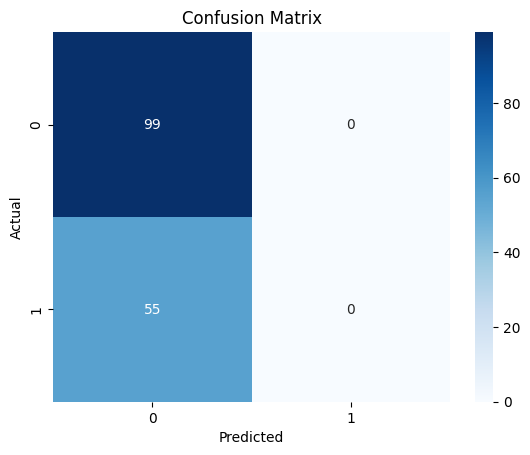

Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:

y_pred = (model.predict(X_test) > 0.5).astype(int)


accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


print('Classification Report:')
print(classification_report(y_test, y_pred))



In [ ]:
model.save('/content/diabetes_ann_model.h5')


loaded_model = keras.models.load_model('/content/diabetes_ann_model.h5')


In [ ]:
sample_data = np.array([X_test[0]])

prediction = (loaded_model.predict(sample_data) > 0.5).astype(int)
print(f'Prediction for sample data: {prediction[0][0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Prediction for sample data: 0
